In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

gcp_project = os.environ['GCP_PROJECT']

In [3]:
from google.cloud import bigquery

PROJECT = "le-wagon-hedge-fund"
DATASET = "data_alpaca_20240604"
TABLE = "SP500_Historical_Weekly"

query = f"""
    SELECT *
    FROM {PROJECT}.{DATASET}.{TABLE}
    """

client = bigquery.Client(project=gcp_project)
query_job = client.query(query)
result = query_job.result()
df = result.to_dataframe()

In [4]:
time_df = df.pivot(index='timestamp',columns='symbol',values='close')
returns_df = time_df.pct_change()#.dropna()
expected_returns=pd.DataFrame(returns_df.mean(), columns=['expected_return'])

/tmp/ipykernel_45312/4269565657.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = time_df.pct_change()#.dropna()


In [74]:
# Removing all stocks that have more than 50 missing observations

s = returns_df.isna().sum()>50
to_ban = list(s[s].index)
returns_df = returns_df[returns_df.columns[~returns_df.columns.isin(to_ban)]]

In [183]:
# Imputing

returns_df = returns_df.fillna(returns_df.mean())

In [76]:
y = returns_df.iloc[-1]
y

symbol
A      -0.134409
AAL    -0.169075
AAP     0.015380
AAPL    0.011949
ABBV    0.026614
          ...   
XYL    -0.022392
YUM    -0.001598
ZBH    -0.010824
ZION    0.002321
ZTS    -0.002999
Name: 2024-05-27 04:00:00+00:00, Length: 494, dtype: float64

In [184]:
X = returns_df.iloc[:-1]
X

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-11 05:00:00+00:00,-0.038352,-0.039881,-0.008725,0.001753,0.030368,-0.052981,-0.003196,0.010896,0.015026,-0.003201,...,-0.026063,-0.002795,0.038693,-0.008773,-0.051095,-0.040442,-0.015409,-0.004628,-0.091870,-0.054490
2016-01-18 05:00:00+00:00,0.023444,0.036120,0.000970,0.044168,0.025985,-0.019079,-0.012580,0.029918,0.005159,0.031313,...,-0.005352,0.114693,-0.013019,0.018233,-0.003297,0.031837,0.028171,-0.019094,-0.037153,0.000461
2016-01-25 05:00:00+00:00,-0.008689,-0.029133,0.052759,-0.040229,-0.066803,-0.015824,-0.054459,0.032277,-0.005578,0.048268,...,0.026905,0.053437,0.016717,0.023818,0.074972,0.056421,0.049145,0.001109,0.054393,-0.008065
2016-02-01 05:00:00+00:00,-0.042762,-0.057451,-0.053338,-0.034107,-0.032423,-0.054265,-0.011625,-0.062251,-0.111410,-0.075009,...,-0.039162,-0.043764,0.028645,0.001698,-0.029744,0.019750,-0.036065,-0.042817,-0.046296,-0.049710
2016-02-08 05:00:00+00:00,0.004994,0.029116,-0.022023,-0.000319,-0.010166,0.010744,-0.007485,-0.043144,-0.031944,-0.003613,...,-0.007463,-0.008737,0.011863,-0.072216,-0.072939,0.010366,-0.034690,-0.033996,-0.029589,-0.011733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22 04:00:00+00:00,0.037746,-0.016300,-0.045114,0.026061,-0.040803,0.000000,0.002330,-0.027992,0.026967,0.101494,...,0.000000,0.000000,-0.016016,0.002295,-0.148418,0.035670,0.023610,-0.000670,0.046092,0.081365
2024-04-29 04:00:00+00:00,0.012415,-0.002161,0.015571,0.083166,0.026125,0.000000,-0.015159,-0.013961,0.018050,-0.011586,...,0.000000,0.000000,-0.016616,-0.074583,-0.045714,0.036329,-0.052409,0.019355,0.044540,0.054602
2024-05-06 04:00:00+00:00,0.073933,0.039711,-0.016774,-0.001800,-0.018560,0.000000,-0.010954,0.008627,-0.008001,0.037870,...,0.000000,0.000000,0.016897,-0.014139,0.013473,0.042198,0.024416,-0.002877,0.016048,0.011791


In [186]:
X.shape[0]

437

In [78]:
X = X.to_numpy().reshape(X.shape[1],437,1)

In [79]:
y = y.to_numpy()

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<Axes: ylabel='Count'>

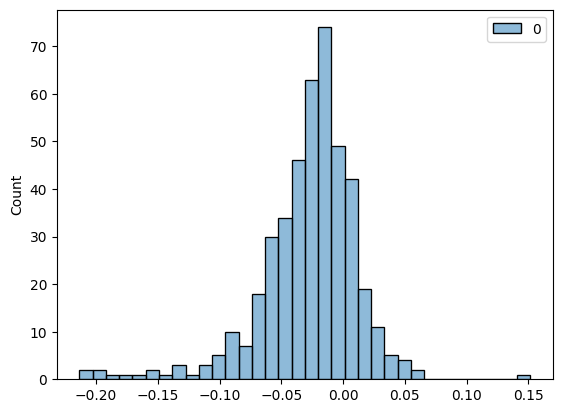

In [81]:
import seaborn as sns

sns.histplot(X[0])

In [82]:
from tensorflow.keras.layers import Normalization

normalizer = Normalization()
normalizer.adapt(X_train)

In [151]:
# 0- Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

def initialize_model_RNN():
    # 1- RNN Architecture
    model = Sequential()
    model.add(normalizer)
    model.add(layers.SimpleRNN(units=20, activation='tanh'))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(1, activation="linear"))

    # 2- Compilation
    model.compile(loss='mse',
                optimizer='rmsprop',
                metrics=['mae']) # very high lr so we can converge with such a small dataset

    return model

In [152]:
# 0- Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

def initialize_model_LSTM():
    # 1- RNN Architecture
    model = Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(units=20, activation='tanh'))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(1, activation="linear"))

    # 2- Compilation
    model.compile(loss='mse',
                optimizer='rmsprop',
                metrics=['mae']) # very high lr so we can converge with such a small dataset

    return model

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train.reshape(-1,), validation_split=.2, batch_size=32, epochs=20, verbose=1, callbacks=[es])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0019 - mae: 0.0287 - val_loss: 9.9808e-04 - val_mae: 0.0225
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0018 - val_mae: 0.0337
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0017 - mae: 0.0267 - val_loss: 0.0010 - val_mae: 0.0226
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0015 - mae: 0.0270 - val_loss: 0.0010 - val_mae: 0.0232
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0013 - mae: 0.0232 - val_loss: 0.0010 - val_mae: 0.0226
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0019 - mae: 0.0264 - val_loss: 9.9197e-04 - val_mae: 0.0225
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0014 - mae: 0.0246 - val_loss: 9.9463e-04 - val_mae: 0.0226
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0012 - mae: 0.0215 - val_loss: 0.0012 - val_mae: 0.0248
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step -

In [86]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 437, 1)         │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,327 (5.19 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 3 (16.00 B)

 Optimizer params: 663 (2.59 KB)

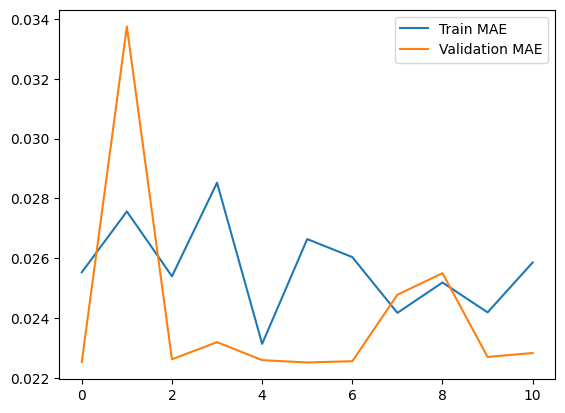

In [89]:
import matplotlib.pyplot as plt

plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [90]:
model_mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {model_mae[1]:.4f}')

Model Mean Absolute Error 0.0243


In [91]:
def constant_prediction(X, y):
    errors = []
    for xx, yy in zip(X, y):
        last_return = xx[-1][0]        # Using the 10th salary to predict the 11th salary
        errors.append(yy - last_return)

    return errors

errors_baseline = constant_prediction(X, y)
mae_baseline = np.mean(np.abs(errors_baseline))

print(f'Baseline MAE = {mae_baseline:.3f}')
print("vs.")
print(f'RNN MAE = {model_mae[1]:.3f}')

Baseline MAE = 0.038
vs.
RNN MAE = 0.024


In [93]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [111]:
results = pd.DataFrame({'y_test':y_test,'y_pred':y_pred.reshape(-1)})

In [120]:
results

,y_test,y_pred
0,0.000000,0.012297
1,0.034388,-0.022907
2,0.002748,-0.001276
3,-0.001524,-0.002230
4,0.022889,0.003164
...,...,...
94,0.014387,-0.005397
95,0.026422,-0.010838
96,0.005438,0.015906
97,0.022363,0.008158


In [116]:
(results.y_test * results.y_pred > 0).sum()

43

In [118]:
43/99

0.43434343434343436

In [145]:
model.predict(X_test[:,400:,:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step


array([[ 1.24558769e-02],
       [-2.32178811e-02],
       [-2.00103270e-04],
       [-2.71932059e-03],
       [ 2.79820687e-03],
       [ 2.42046062e-02],
       [ 3.98371136e-04],
       [-6.52260799e-03],
       [-2.70059761e-02],
       [ 4.35984973e-03],
       [ 2.14474159e-03],
       [ 1.59522686e-02],
       [ 2.58338987e-03],
       [ 4.93006129e-03],
       [-3.31229344e-02],
       [-8.27295007e-04],
       [-2.10559205e-03],
       [-2.68997741e-03],
       [ 4.09264863e-03],
       [-7.89512880e-03],
       [-1.07460958e-03],
       [ 4.49444633e-03],
       [-8.26990418e-03],
       [-1.33662503e-02],
       [ 1.51711088e-02],
       [ 5.77593455e-04],
       [ 1.57960667e-03],
       [ 1.26689505e-02],
       [ 1.03684864e-03],
       [-1.61870122e-02],
       [-7.80556258e-03],
       [-4.26249672e-03],
       [ 1.24857649e-02],
       [-1.86446588e-02],
       [-9.02227219e-03],
       [ 3.97583563e-03],
       [ 1.71423201e-02],
       [ 4.00194898e-03],
       [-3.3

In [182]:
X_test

array([[[-5.42510121e-02],
        [-1.63170163e-02],
        [ 6.49038462e-02],
        ...,
        [ 1.06911751e-02],
        [ 2.12104072e-03],
        [ 3.61136760e-02]],

       [[ 8.91186169e-05],
        [ 2.16105276e-02],
        [ 8.07298866e-02],
        ...,
        [-9.92295554e-02],
        [ 1.59973380e-02],
        [ 4.80595318e-03]],

       [[-1.67981675e-02],
        [ 3.80491180e-03],
        [ 2.25370251e-02],
        ...,
        [ 3.76455575e-02],
        [ 2.16565350e-02],
        [ 2.39085239e-02]],

       ...,

       [[ 0.00000000e+00],
        [ 2.50917993e-02],
        [ 9.64304742e-02],
        ...,
        [ 4.75113122e-02],
        [-2.04403011e-02],
        [-4.05727924e-02]],

       [[-1.78051169e-02],
        [-4.18288503e-02],
        [-7.75694893e-04],
        ...,
        [ 4.30210938e-02],
        [-6.82242389e-03],
        [-1.79582982e-02]],

       [[ 0.00000000e+00],
        [-5.21998509e-03],
        [-1.26144456e-02],
        ...,
        

In [153]:
model = initialize_model_LSTM()

es = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X,y,validation_split=.2, batch_size=32, epochs=20, verbose=1, callbacks=[es])

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 431ms/step - loss: 0.0015 - mae: 0.0215 - val_loss: 8.5998e-04 - val_mae: 0.0199
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - loss: 0.0016 - mae: 0.0223 - val_loss: 8.5595e-04 - val_mae: 0.0199
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - loss: 0.0016 - mae: 0.0214 - val_loss: 7.8862e-04 - val_mae: 0.0189
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - loss: 9.9201e-04 - mae: 0.0194 - val_loss: 8.0685e-04 - val_mae: 0.0193
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - loss: 0.0016 - mae: 0.0212 - val_loss: 7.6773e-04 - val_mae: 0.0188
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - loss: 0.0014 - mae: 0.0205 - val_loss: 8.5034e-04 - val_mae: 0.0197
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - loss: 0.0019 - mae: 0.0235 - val_loss: 8.1429e-04 - val_mae: 0.0192
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - loss: 0.0012 - mae: 0.0201 - val_loss: 7.8840e-04 - val_mae: 0.0189
Epoch 9/20
13/13 ━━

In [156]:
X.shape

(494, 437, 1)

In [174]:
returns_df.to_numpy().reshape(494,438,1)

array([[[-0.0383519 ],
        [-0.0398811 ],
        [-0.00872492],
        ...,
        [-0.00839702],
        [-0.00451991],
        [-0.01548757]],

       [[-0.00549089],
        [-0.02135731],
        [-0.04626688],
        ...,
        [ 0.04910519],
        [ 0.12185792],
        [ 0.03424988]],

       [[-0.00444547],
        [ 0.03293944],
        [ 0.04328761],
        ...,
        [ 0.07396501],
        [ 0.04793621],
        [ 0.19664269]],

       ...,

       [[ 0.02415715],
        [-0.00363391],
        [ 0.01036866],
        ...,
        [-0.02486898],
        [-0.03664448],
        [ 0.01749161]],

       [[-0.01031895],
        [-0.02410676],
        [-0.04663702],
        ...,
        [ 0.01980816],
        [ 0.00764128],
        [-0.01243914]],

       [[-0.00822085],
        [ 0.01770571],
        [ 0.00730479],
        ...,
        [-0.01082381],
        [ 0.00232072],
        [-0.00299877]]])

In [180]:
X_new = returns_df[-10:].to_numpy().reshape(494,10,1)

In [181]:
model.predict(X_new)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[ 4.0420042e-03],
       [ 4.0535312e-03],
       [ 3.4145745e-03],
       [ 4.2568641e-03],
       [ 4.3198117e-03],
       [ 4.1394960e-03],
       [ 3.9783618e-03],
       [ 4.1950676e-03],
       [ 4.1984897e-03],
       [ 3.7639441e-03],
       [ 4.2375093e-03],
       [ 4.1145943e-03],
       [ 3.5950444e-03],
       [ 4.0176753e-03],
       [ 4.1335667e-03],
       [ 3.1755872e-03],
       [ 4.2579384e-03],
       [ 4.3185968e-03],
       [ 3.4673838e-03],
       [ 4.0906798e-03],
       [ 3.9224895e-03],
       [ 4.4233529e-03],
       [ 4.3633492e-03],
       [ 4.0329155e-03],
       [ 3.9043599e-03],
       [ 3.5135585e-03],
       [ 3.8671994e-03],
       [ 3.4946429e-03],
       [ 4.2857546e-03],
       [ 4.0855482e-03],
       [ 4.1804477e-03],
       [ 4.0773405e-03],
       [ 4.3549337e-03],
       [ 4.1043470e-03],
       [ 4.3810094e-03],
       [ 4.2285179e-03],
       [ 4.0792371e-03],
       [ 4.1149212e-03],
       [ 4.2807502e-03],
       [ 4.4000428e-03],


## Doing the model on Price instead of returns

## LSTM Model